In [2]:
import pandas as pd
df=pd.read_csv('data/auto.csv')

In [3]:
y=df['mpg']
X=df.drop(columns='mpg')

In [4]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'displacement <= 190.5\nsquared_error = 60.763\nsamples = 392\nvalue = 23.446'),
 Text(0.25, 0.5, 'horsepower <= 70.5\nsquared_error = 35.072\nsamples = 222\nvalue = 28.642'),
 Text(0.125, 0.16666666666666666, 'squared_error = 25.405\nsamples = 71\nvalue = 33.666'),
 Text(0.375, 0.16666666666666666, 'squared_error = 22.169\nsamples = 151\nvalue = 26.28'),
 Text(0.75, 0.5, 'horsepower <= 127.0\nsquared_error = 13.001\nsamples = 170\nvalue = 16.66'),
 Text(0.625, 0.16666666666666666, 'squared_error = 10.026\nsamples = 74\nvalue = 19.438'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4.761\nsamples = 96\nvalue = 14.519')]

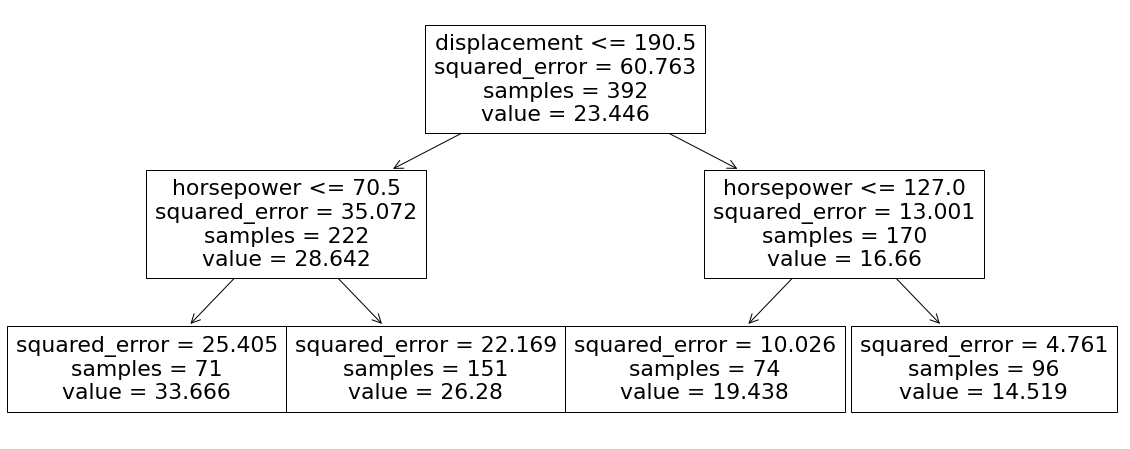

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plot_tree(reg,feature_names=X.columns)

In [6]:
from sklearn.model_selection import KFold, cross_validate
kfold=KFold(n_splits=5, shuffle=True)
train_mse=[]
test_mse=[]
for i in range(2,30):
    reg = DecisionTreeRegressor(max_depth=i)
    reg.fit(X,y)
    result=cross_validate(X=X,y=y,cv=kfold,scoring=['r2','neg_mean_squared_error'],estimator=reg, return_train_score=True)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())
    train_mse.append(-1*result['train_neg_mean_squared_error'].mean())
    test_mse.append(-1*result['test_neg_mean_squared_error'].mean())

2 0.6635637769935429 -20.180739479820424
3 0.8107602050883358 -11.572174618148368
4 0.8071139164054143 -11.82528148506368
5 0.8099612321553913 -11.371428353844578
6 0.8032596905451774 -11.284592298196955
7 0.7616900081734496 -14.509492239336499
8 0.7982900585491519 -12.13705408088047
9 0.79639944022388 -11.968077738635698
10 0.7316017595550309 -15.392835217190306
11 0.7830999533474781 -13.148893948581383
12 0.7524133149086365 -14.948383857201003
13 0.7353635686597775 -15.878000465216923
14 0.7775613305814267 -13.340179875918235
15 0.7611729940597758 -14.266273991128424
16 0.7553579703017885 -14.139586396876183
17 0.6939508375940984 -17.75633928378232
18 0.7424703884789101 -15.378280753002272
19 0.7589916665757726 -14.503056150600452
20 0.7702712642980556 -13.50981953911068
21 0.7134455912820263 -17.317494320025965
22 0.7393725965007621 -15.892502434274586
23 0.7865763621399663 -12.751984745212592
24 0.7473978002157399 -15.015993184031156
25 0.7526196421958982 -14.604517039922104
26 0.7

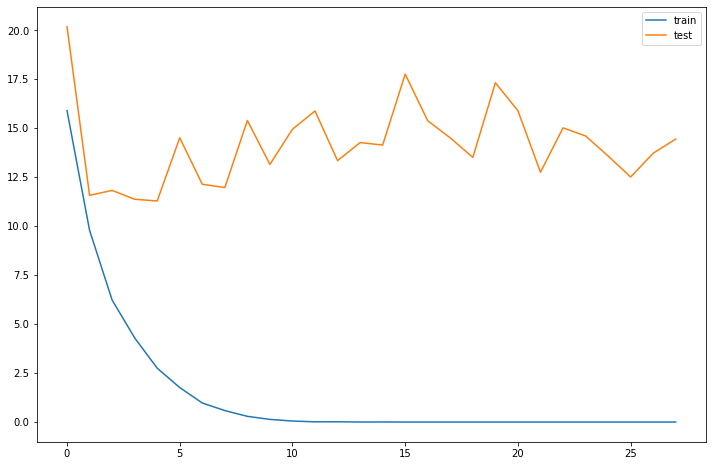

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train_mse,label='train')
plt.plot(test_mse,label='test')
plt.legend()

# 질문이 많아질수록 유연성이 높아지고 오버피팅 가능성 높아짐 -> max_depth 조절 필요
# DT는 설명력이 좋으나 오버피팅 되기 쉽다는 단점이 있음

## Random Forest

DT의 단점 보완

In [8]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
train_mse=[]
test_mse=[]
for i in range(2,30):
    reg = RandomForestRegressor(max_depth=i)
    reg.fit(X,y)
    result=cross_validate(X=X,y=y,cv=kfold,scoring=['r2','neg_mean_squared_error'],estimator=reg, return_train_score=True)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())
    train_mse.append(-1*result['train_neg_mean_squared_error'].mean())
    test_mse.append(-1*result['test_neg_mean_squared_error'].mean())

2 0.7409327684418134 -15.515597901574143
3 0.8382139811521483 -9.68431994724464
4 0.865527487599714 -8.162104802941958
5 0.8620708932890591 -7.9788391669545025
6 0.867605640170266 -8.235055610521952
7 0.8697350067716092 -7.764312516275657
8 0.8702510246306723 -7.84524700278472
9 0.872339728191071 -8.035578563361401
10 0.8713050796534223 -7.620290656708671
11 0.8768702527159234 -7.404459981538809
12 0.8564752464448675 -8.259957925638142
13 0.8752408867206312 -7.377139521826985
14 0.875650977741914 -7.323778462563604
15 0.8717758546682474 -7.824510875795818
16 0.8696322371797655 -7.6015890930693075
17 0.873117361909574 -7.669420621418006
18 0.8722665109615108 -7.552722162479709
19 0.8686067555797405 -7.585478008260298
20 0.8656103634009831 -7.834593851898733
21 0.8745385245524 -7.4845548240506306
22 0.8634882319345032 -8.261458408179156
23 0.8713767505430653 -7.836432145050301
24 0.8730037557894577 -7.597732820220706
25 0.8756190746697037 -7.670259694482309
26 0.8610316238773095 -8.27348

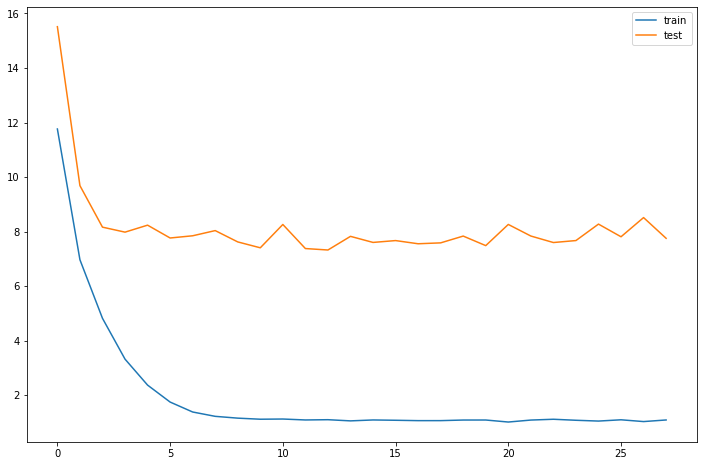

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train_mse,label='train')
plt.plot(test_mse,label='test')
plt.legend()

## Hyper Parameter Search for Random Forest

In [10]:
# 바꾸어가면서 보고싶은 패러미터의 범위를 딕셔너리로 저장
param_grid = { 
    'n_estimators': [50,100,200,300], # 트리의 수
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,10,20],    
}

In [11]:
from sklearn.model_selection import GridSearchCV
kfold=KFold(n_splits=5, shuffle=True)
reg = RandomForestRegressor()
#param_grid : 탐색 범위, verbose : 모델의 성능 기록, n_jobs : CPU의 갯수 지정
grid=GridSearchCV(estimator=reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold, verbose=2, n_jobs=-1)

In [12]:
grid.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ....max_depth=3, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=3, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=3, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=3, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=3, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.5s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=200; total time=   1.0s
[CV] END ...max_depth=3, max_features=auto, n_e

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [13]:
grid.best_score_

-7.17541951509657

In [14]:
grid.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}